# Vamos aplicar o que aprendemos sobre métricas
*   Complete com o código em falta
*   Sempre que necessário, **substitua** ___

---

dataset: [fonte](https://www.kaggle.com/datasets/charleyhuang1022/contract-renewal-prediction?select=South_China.csv)

---


Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [1]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd

# vamos importar o dataframe do ficheiro .csv
df_contract_renewal = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/South_China.csv")

In [3]:
df_contract_renewal.head()

,ID,Registration_Duration,Revenue,Cost,Renewal
0,10001,29,46,8.33316,True
1,10002,58,105,18.24564,True
2,10003,36,55,3.13296,True
3,10004,32,28,9.96705,True
4,10005,26,32,7.19040,False


In [2]:
# veja as 5 primeiras linhas do dataframe
df_contract_renewal.head()
# veja a forma do dataframe: quantas linhas, quantas colunas?
df_contract_renewal.shape
# veja a informação sobre o dataframe
df_contract_renewal.info()
# veja a descrição das variáveis numéricas
df_contract_renewal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1500 non-null   int64  
 1   Registration_Duration  1500 non-null   int64  
 2   Revenue                1500 non-null   int64  
 3   Cost                   1500 non-null   float64
 4   Renewal                1500 non-null   bool   
dtypes: bool(1), float64(1), int64(3)
memory usage: 48.5 KB


,ID,Registration_Duration,Revenue,Cost
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,10750.500000,33.756000,58.387333,6.191050
std,433.157015,10.928133,61.862056,8.206847
min,10001.000000,19.000000,13.000000,0.513600
25%,10375.750000,25.000000,28.000000,1.821140
50%,10750.500000,33.000000,40.000000,3.735905
75%,11125.250000,40.000000,64.000000,7.245237
max,11500.000000,72.000000,981.000000,96.471200


In [4]:
# defina a variável alvo como sendo a coluna "Renewal"
target_variable = "Renewal"

# train_test split usando a função train_test_split
X = df_contract_renewal.drop(["ID", target_variable], axis = 1)
y = df_contract_renewal[target_variable]*1

# importe a função train_test_split e defina X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12,
                                                    stratify = y)

In [6]:
# aplique o modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# verifique a accuracy do modelo
knn.score(X_test, y_test)

0.6755555555555556

In [7]:
# aplique o modelo de regressão logística
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( max_iter = 250)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# verifique a accuracy do modelo
log_reg.score(X_test, y_test)

0.7177777777777777

In [8]:
labels = ['cancelou', 'renovou']

# faça import do classification_report e da confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# veja a matriz de confusão dos modelos
print(confusion_matrix(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_log_reg))

# veja as métricas através do report
print(classification_report(y_test, y_pred_knn, target_names = labels))
print(classification_report(y_test, y_pred_log_reg, target_names = labels))


[[ 78  86]
 [ 60 226]]
[[ 93  71]
 [ 56 230]]
              precision    recall  f1-score   support

    cancelou       0.57      0.48      0.52       164
     renovou       0.72      0.79      0.76       286

    accuracy                           0.68       450
   macro avg       0.64      0.63      0.64       450
weighted avg       0.67      0.68      0.67       450

              precision    recall  f1-score   support

    cancelou       0.62      0.57      0.59       164
     renovou       0.76      0.80      0.78       286

    accuracy                           0.72       450
   macro avg       0.69      0.69      0.69       450
weighted avg       0.71      0.72      0.71       450



In [9]:
# importe a curva roc
from sklearn.metrics import roc_curve

# calcule as probabilidades previstas (.predict_proba)
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:,1]

# gere a curva ROC
FPR, TPR, thresholds = roc_curve(y_test, y_pred_log_reg_prob)


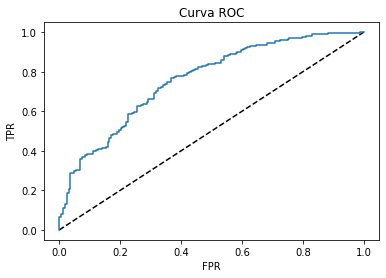

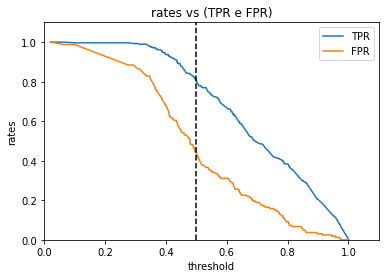

In [10]:
# visualize a curva ROC
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

# visualize a influência do threshold
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.plot(thresholds[1:], TPR[1:])
plt.plot(thresholds[1:], FPR[1:])
plt.plot([0.5, 0.5], [0, 1.1], 'k--')
plt.xlabel('threshold')
plt.ylabel('rates')
plt.legend(['TPR', 'FPR'])
plt.title('rates vs (TPR e FPR)')
plt.show()

In [11]:
log_reg.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [12]:
log_reg.predict_proba(X_test)

array([[4.87433264e-01, 5.12566736e-01],
       [2.87512179e-01, 7.12487821e-01],
       [3.53570456e-01, 6.46429544e-01],
       [6.49395684e-01, 3.50604316e-01],
       [4.41568861e-01, 5.58431139e-01],
       [1.30281961e-02, 9.86971804e-01],
       [4.91649968e-01, 5.08350032e-01],
       [2.46144176e-02, 9.75385582e-01],
       [8.16878551e-01, 1.83121449e-01],
       [5.46934069e-01, 4.53065931e-01],
       [6.88161490e-01, 3.11838510e-01],
       [1.05719124e-01, 8.94280876e-01],
       [1.93054548e-02, 9.80694545e-01],
       [3.79844655e-01, 6.20155345e-01],
       [3.51987842e-02, 9.64801216e-01],
       [3.77995601e-01, 6.22004399e-01],
       [3.31749825e-01, 6.68250175e-01],
       [1.55111855e-01, 8.44888145e-01],
       [2.46774625e-01, 7.53225375e-01],
       [6.11244840e-01, 3.88755160e-01],
       [3.68771416e-01, 6.31228584e-01],
       [4.48347574e-01, 5.51652426e-01],
       [3.36792393e-01, 6.63207607e-01],
       [5.51493523e-01, 4.48506477e-01],
       [5.915488

In [13]:
# calcule a AUC
from sklearn.metrics import roc_auc_score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_log_reg_prob)))

AUC: 0.7591676616066858
